## Decision Trees: Regression

In this notebook, we will learn how to calculate and pick the best split for a given node, use *sklearn*'s ability to visualize, and then prune, decision trees. We will start with the decision tree we started in the lecture so you can compare your calculations to those of sklearn. 

Note that visualizing trees is really only going to make sense for fairly small datasets, or if you use various ways to limit the size of the tree. 

In [3]:
from sklearn.tree import DecisionTreeRegressor  # code to create a decision tree for regression
from sklearn import tree                        # code to visualize a decision tree
import matplotlib.pyplot as plt                 # needed to draw the nodes and branches
import pandas as pd                             

Now let's create the same data that we used in the lecture and store that in a *Pandas* dataframe:

In [4]:
x = [1.5, 1., 2., 3., 2.5]
y = [1, 1.5, 2.5, 2.5, 3.]

df = pd.DataFrame({'x':x , "y":y})
df

,x,y
0,1.5,1.0
1,1.0,1.5
2,2.0,2.5
3,3.0,2.5
4,2.5,3.0


### Manually calculate best split

In [5]:
# sort the data
df=df.sort_values(by='x')
df

,x,y
1,1.0,1.5
0,1.5,1.0
2,2.0,2.5
4,2.5,3.0
3,3.0,2.5


In [6]:
(1+1.5)/2 #the first mean

1.25

In [7]:
1.25, 1.75, 2.25, 2.75

(1.25, 1.75, 2.25, 2.75)

In [8]:
import numpy as np

In [9]:
y_avg = np.mean(df.y)
y_avg

2.1

In [10]:
root_err = np.mean((df.y - y_avg)**2)
root_err

0.54

In [11]:
df

,x,y
1,1.0,1.5
0,1.5,1.0
2,2.0,2.5
4,2.5,3.0
3,3.0,2.5


### Split 1

x >=1.25

In [12]:
# False
# (x = 1, y = 1.5)
avg_F = 1.5
mse_F = np.mean((1.5-1.5)**2)
mse_F # the error is 0

0.0

In [13]:
# True

(1.5,1), (2.0,2.5), (2.5,3.0), (3.0,2.5)
avg_T = (1+2.5+3.0+2.5)/4
avg_T

2.25

In [14]:
mse_T = ((1 - 2.25)**2 + (2.5 - 2.25)**2 + (3 - 2.25)**2 + (2.5 - 2.25)**2)/4
mse_T

0.5625

In [15]:
# Calculate the ponderada mean to discover the all errors. The amount of data in each side
mse_after_split = (1/5)*mse_F + (4/5)*mse_T
mse_after_split

0.45

### Split 2

x >= 1.75    - do the other splits

In [16]:
df

,x,y
1,1.0,1.5
0,1.5,1.0
2,2.0,2.5
4,2.5,3.0
3,3.0,2.5


In [17]:
# False
# (1, 1.5), (1.5, 1.0)
avg_F2 = (1.5 + 1.0)/2
mse_F2 = ((1.5 - avg_F2)**2 + (1.0 - avg_F2)**2)/2
mse_F2

0.0625

In [18]:
# True
#(2.0, 2.5) (2.5, 3.0) (3.0, 2.5)
avg_T2 = (2.5 + 3.0 + 2.5)/3
mse_T2 = ((2.5 - avg_T2)**2 + (3.0 - avg_T2)**2 + (2.5 - avg_T2)**2)/3
mse_T2

0.05555555555555556

In [19]:
# Wheighted mean
mse_after_split2 = (2/5)*mse_F2 + (3/5)*mse_T2
mse_after_split2

0.058333333333333334

### Create and visualize tree

To train our decision tree model, we need to show it the *features* and the *answers*, so we will extract both of those from our dataframe:

In [20]:
X = df.drop('y', axis =1)   
y = df['y']                 

We now train our model by passing our data into it so that it can find all the proper split points to create the decision tree. 

In [21]:
regr = DecisionTreeRegressor(random_state=1234)  
model = regr.fit(X, y)                           

Now we plot the results.

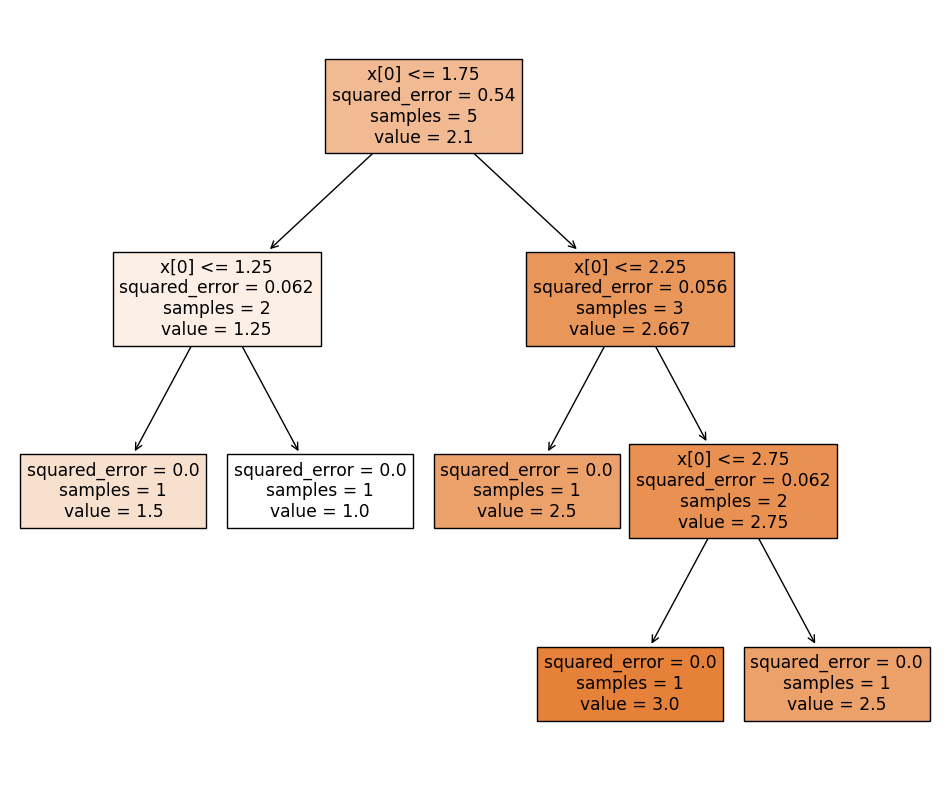

In [48]:
fig = plt.figure(figsize=(12,10))             # use this to adjust the size of the image
_ = tree.plot_tree(regr, filled=True)         # plots the decision tree (ignore the weird "_ =" at the beginning for now)

### Prune the Tree

We know that decision trees have a tendency to overfit. In our lecture we talked about a few ways we can try to stop a decision tree from overfitting (that is, stop it from expanding until there is one data point in each leaf node). In this section you will play around with some of these methods by adjusting some of the hyper-parameters of the tree: `max_depth`, `min_samples_split`, and `min_samples_leaf`.

Take a look at the documentation for [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) to familiarize yourself with how these parameters work. 

Now try using each one of these in the code below and compare the decision tree you get with the original one above. You should be able to clearly see which nodes were "pruned" from the tree. 

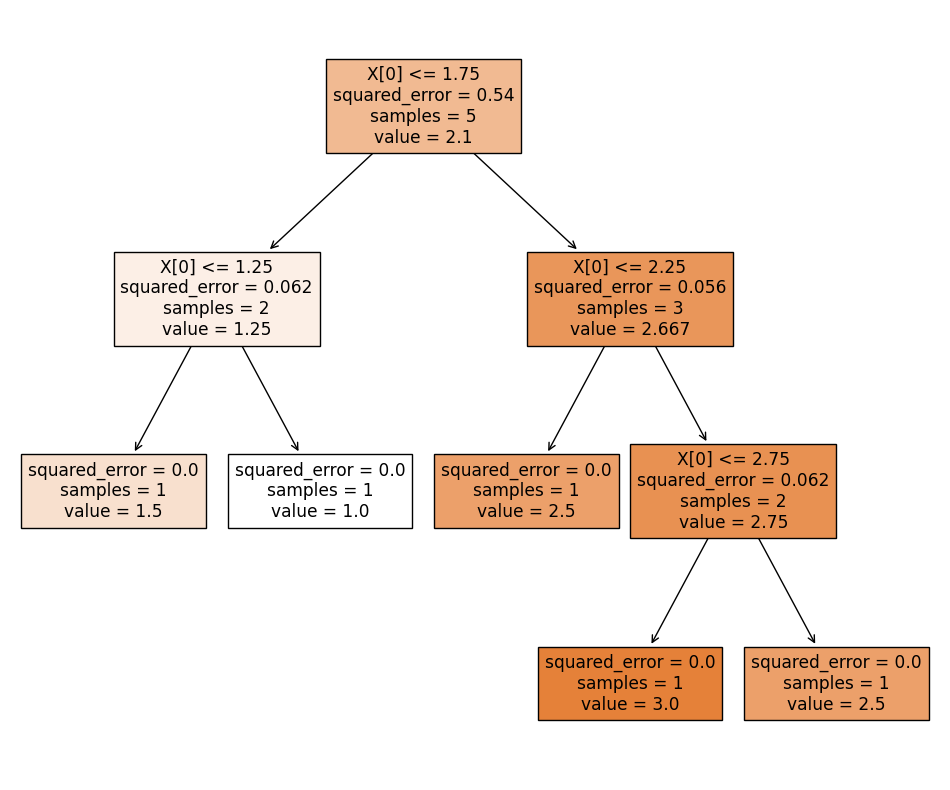

In [22]:
regr = DecisionTreeRegressor(random_state=1234, max_depth = 3)  
model = regr.fit(X, y)   

fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(regr, filled=True)